## Project 2 - Machine Error - Tiange Chang
    MTH337 - Fall 2018 
    Instructor - Rahul Kashyap

### The Definition of Machine Error
By definition "A machine error is an error caused by a physical defect issue instead of an error caused by a human in the software code or by the user of the hardware device. (Computer Hope)". 

In this project, I will focus on the error that caused by floating point representation. This type of error are also called floating point error. The reason cause this error is because computers can only store fixed number of digits. In order to deal with larger numbers, the computer repredent data in sets of binary digits. However, in the real world, we use decimal numbers, when machines doing the calculations, if the number is too larger or it is a recurrent number which computers do not understand, it will run out of digits and there will be a loss of precision. 

P.S. the citation is at the end of the page. 


### Basic concept and example of floating point error
We expect that computers should be very accurate at numbers, a very simple example will be we expect that 0.1 + 0.2 = 0.3. However, when we do that in computer programming language we will have a different number( see example below). 

In [1]:
0.1 + 0.2

0.30000000000000004

This is the error we called machine error. In order to deal with very larger number and make the calculation fast, the computer stores number in either 32 bits, 64 bits or 80 bits. 

In order to standard the computation, there is a way to calculate called IEEE 754. The definition is "The IEEE Standard for Floating-Point Arithmetic (IEEE 754) is a technical standard for floating-point computation established in 1985 by the Institute of Electrical and Electronics Engineers (IEEE). The standard addressed many problems found in the diverse floating point implementations that made them difficult to use reliably and portably. Many hardware floating point units now use the IEEE 754 standard.(Wiki)".

The normalized number have this form: [$\pm$] 1. [mantissa] $\times$ $2^{[exponent]}$. For example, 200 in decimal is 11001000 in binary. 

We can write it in the format above: [0]1.[1001000] $\times$ $2^7$. 

The IEEE754 format is in below:

   | Precision | sign | exponent | mantissa | total |
   |-----------|------|----------|----------|-------|
   |single     |  1   |     8    |   23     |  32   |
   |double     |  1   |    11    |   52     |  64   |
   |long double|  1   |    15    |   64     |  80   |

I will take 64 bits as an example because this is the most common one. 

   |sign   |   exponent  |   mantissa  |   total  |
   |-------|-------------|-------------|----------|
   |1 bit  |    11bits   |    52bits   |  64 bits |

The sign bit shows the positive and negative sign of the number, if the number is positive the sign bit is 0, and 1 for negative numbers. "The IEEE 754-2008 standard specification defines a 64 bit floating-point format with: an 11-bit binary exponent, using "excess-1023" format. Excess-1023 means the exponent appears as an unsigned binary integer from 0 to 2047; subtracting 1023 gives the actual signed value.(Wiki)" For the exponent number,  we use 1023 plus or minus the exponent we get and then change to binary. The exponent for 200 will be 1023 + 7 = 1030, and 10000000110 in binary. 

As a result, we can wrote 200 in decimal to IEEE754 like this:

   |    0    |      10000000110    |     1001000000000000000000000000000000000000000000000000   |
   |---------|---------------------|------------------------------------------------------------|
   |sign     |     exponent        |               mantissa                                     |

From the above we can tell that computers cannot store recurrent or infinite many numbers, here is another example:

In base 10, we calculate $(\frac{1}{3})$ + $(\frac{1}{3})$ + $(\frac{1}{3})$, we will have 0.$\overline{333}$ + 0.$\overline{333}$ + 0.$\overline{333}$ = 0.$\overline{999}$ = 1. Because we understand recurrent numbers. However, in base 2, when we doing the same calculation, the computer does not undestand recurrent number, the calculation stop when we are running out of digits.  

It is simple to prof, in base 10, $(\frac{1}{10})$ + $(\frac{2}{10})$ = $(\frac{3}{10})$ = 0.3. However, in base 2, $(\frac{1}{10})$ =  0.0$\overline{0011}$ which is a recurrent number, we can see the result(error) in below. 


In [2]:
(1/10)+(2/10)

0.30000000000000004

### Machine epsilon
"Machine epsilon gives an upper bound on the relative error due to rounding in floating point arithmetic. This value characterizes computer arithmetic in the field of numerical analysis, and by extension in the subject of computational science. The quantity is also called macheps or unit roundoff, and it has the symbols Greek epsilon 
ϵ or bold Roman u, respectively.(Wiki)"

In the first step of part 1, I am going to write a function called findEpsilon which finds the machine epsilon by determining the smallest floating point number larger than 1 that can be stored in the machine.

In [3]:
# write a function to calculate the smallest floating point number larger than 1 that can be stored in the machine.

def findEpsilon():
    
    """
    
    function returns the value of the smallest floating point 
    number larger than 1 that can be stored in the machine.
    
    keywords: returns the exponent bryond which machine does not 
    see difference between numbers and the value of machine epsilon 
    in decimal as a pair of numbers. 
    
    """
    
    # set exponent equal to 1
    
    x = 1
    y = 2 ** (-x)  
    
    # divide the exponent by 2 in a while loop until the machine cannot tell the difference
    
    while (1 + y != 1):
        x = y
        y = y/2
        
    MachineEpsilon = y*2
    

    return MachineEpsilon

In [4]:
# check the answer
findEpsilon()

2.220446049250313e-16

In [5]:
# write a function to find the largest floating point number that can be stored in the machine.

def findLargest():

    """
    
    function returns the largest floating point number that can be stored in the machine.
    
    keywords: Use system-specific parameters and functions --- "sys" to print out the max 
    floating point. 
    
    """
    
    # import system-specific parameters and functions
    import sys
    
    # return the max value of floating point    
       
    return ("{}".format(sys.float_info.max))

# check the answer
findLargest()

'1.7976931348623157e+308'

In [6]:
# print out the exponent
print(bin(-16))
print(int('16', base = 10))
print(bin(308))
print(int('308', base = 10))

-0b10000
16
0b100110100
308


| Decimal |    Binary   | Scientific notation    | Sign bit | Exponent | Mantissa | 
|---------|-------------|------------------------|----------|----------|----------|
|    9    |  1001       | $1.001 \times 2^3$     |    0      |10000000010|0010000000000000000000000000000000000000000000000000|
|    45   | 101101      | $1.01101 \times 2^5$   |    0      |10000000100|0110100000000000000000000000000000000000000000000000|
|   25    | 11001       | $1.1001 \times 2^4$    |    0      |10000000011|1001000000000000000000000000000000000000000000000000|
| 11.105  |             |$1.011000110101110000101 \times 2^3$|    0      |10000000010|0110001101011100001010000000000000000000000000000000|
| 19.40625| 10011.01101 |$1.001101101 \times 2^4$|    0      |10000000011|0011011010000000000000000000000000000000000000000000|
|   12    |  1100       | $1.100 \times 2^3$     |    0      |10000000010|1000000000000000000000000000000000000000000000000000|
|   51    | 110011      | $1.10011 \times 2^5$   |    0      |10000000100|1001100000000000000000000000000000000000000000000000|

    1.  9/2 = 4...1
        4/2 = 2...0
        2/2 = 1...0
        1/2 = 0...1
       
       Decimal 9 in binary is the reveres order of the remainder: 1001.
   
The scientific notation is $1.001 \times 2^3$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000010 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 3 = 1026, and then transfrom to binary: 
   
       1026/2 = 513...0
       513/2 = 256...1
       256/2 = 128...0
       ...
       1/2 = 0...1

The mantissa is 0010000000000000000000000000000000000000000000000000 because the binary is $1.001 \times 2^3$ and 1 is defult, so it starts 001 and fill out by 0. 

-----

   2.  101101 = $1.01101 \times 2^5$ = 45
   
The scientific notation is $1.01101 \times 2^5$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000100 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 5 = 1028, and then transfrom to binary: 
   
       1028/2 = 514...0
       514/2 = 257...0
       257/2 = 128...1
       ...
       1/2 = 0...1

The mantissa is 0110100000000000000000000000000000000000000000000000 because the binary is $1.001 \times 2^3$ and 1 is defult, so it starts 001 and fill out by 0. 

---

    3.  25/2 = 12...1
        12/2 = 6...0
        6/2 = 3...0
        3/2 = 1...1
        1/2 = 0...1
       
       Decimal 25 in binary is the reveres order of the remainder: 11001.
   
The scientific notation is $1.1001 \times 2^4$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000011 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 4 = 1027, and then transfrom to binary: 
   
       1027/2 = 513...1
       513/2 = 256...1
       256/2 = 128...0
       ...
       1/2 = 0...1

The mantissa is 1001000000000000000000000000000000000000000000000000 because the binary is $1.1001 \times 2^4$ and 1 is defult, so it starts 1001 and fill out by 0. 

----

     4. for number 11.105, I will calulate 11 first and then 0.105 
     
         11/2 = 5...1
         5/2 = 2...1
         2/2 = 1...0
         1/2 = 0...1

   Decimal 11 in binary is the reveres order of the remainder: 1011
   
         0.105 * 2 = 0.21...0
         0.21 * 2 = 0.42...0
         0.42 * 2 = 0.84...0
         0.84 * 2 = 1.68...1
         0.68 * 2 = 1.36...1
         0.36 * 2 = 0.72...0
         0.72 * 2 = 1.44...1
         0.44 * 2 = 0.88...0
         0.88 * 2 = 1.76...1
         0.76 * 2 = 1.52...1
         0.52 * 2 = 1.04...1
         0.04 * 2 = 0.08...0
         0.08 * 2 = 0.16...0
         0.16 * 2 = 0.32...0
         0.32 * 2 = 0.64...0
         0.64 * 2 = 1.28...1
         0.28 * 2 = 0.56...0
         0.56 * 2 = 1.12...1
                 ...
                 

11.105 = 1011.000110101110000101

The scientific notation is $1.011000110101110000101 \times 2^3$ .
   
   The sign bit is 0 becuase the number is positive. 

   The exponent is 10000000010 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 3 = 1026, and then transfrom to binary: 
   
       1026/2 = 513...0
       513/2 = 256...1
       256/2 = 128...0
       ...
       1/2 = 0...1

The mantissa is 0110001101011100001010000000000000000000000000000000 

----

   5.  10011.01101 = $1.001101101 \times 2^4$ = 19.40625
   
The scientific notation is $1.001101101 \times 2^4$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000011 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 4 = 1027, and then transfrom to binary: 
   
       1027/2 = 513...1
       513/2 = 256...1
       256/2 = 128...0
       ...
       1/2 = 0...1

The mantissa is 0011011010000000000000000000000000000000000000000000 because the binary is $1.001101101 \times 2^4$ and 1 is defult, so it starts 001101101 and fill out by 0. 

----

    6.  12/2 = 6...0
        6/2 = 3...0
        3/2 = 1...1
        1/2 = 0...1
       
       Decimal 25 in binary is the reveres order of the remainder: 11001.
   
The scientific notation is $1.100 \times 2^3$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000010 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 3 = 1026, and then transfrom to binary, which is the same as the first number in the table: 
   
       1026/2 = 513...0
       513/2 = 256...1
       256/2 = 128...0
       ...
       1/2 = 0...1

The mantissa is 1000000000000000000000000000000000000000000000000000 because the binary is $1.100 \times 2^3$ and 1 is defult, so it starts 1001 and fill out by 0. 

----

7.  110011 = $1.10011 \times 2^5$ = 51
   
The scientific notation is $1.10011 \times 2^5$ .
      
       The sign bit is 0 becuase the number is positive. 
       
       The exponent is 10000000100 becuase the exponent bias for 64 bit is 1023. The finial exponent is 1023 + 5 = 1028, and then transfrom to binary: 
   
       1028/2 = 514...0
       514/2 = 257...0
       257/2 = 128...1
       ...
       1/2 = 0...1

The mantissa is 1001100000000000000000000000000000000000000000000000 because the binary is $1.001 \times 2^3$ and 1 is defult, so it starts 001 and fill out by 0. 

----

In [15]:
# check the answer for the last case
print(int('110011', base = 2))
print(bin(51))

51
0b110011


Now I will go try to quantify the error in calculating values of functions which are error prone due to the limits of machine precision. The example will be plotting the function below. 

/Users/tiangechang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Text(0,0.5,'$log(1+x)/x$')

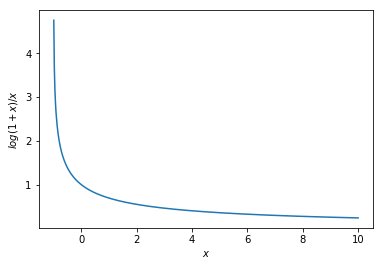

In [16]:
# plot the function g(x) = log(1+x)/x
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

ends = 10

x = np.linspace(-ends, ends, 1000)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

/Users/tiangechang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0,0.5,'$log(1+x)/x$')

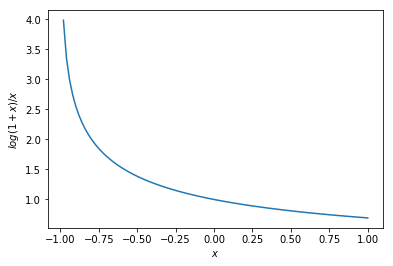

In [17]:
# decrease the value of x 
ends = 1

x = np.linspace(-ends, ends, 100)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

Text(0,0.5,'$log(1+x)/x$')

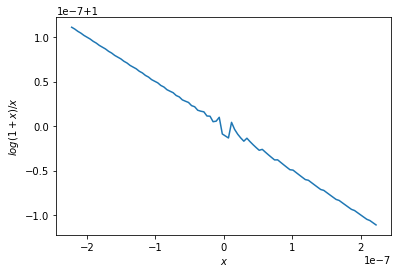

In [18]:
# set x to magnitudes comparable to machine epsilon
ends = 2.220446049250313e-7

x = np.linspace(-ends, ends, 100)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

Text(0,0.5,'$log(1+x)/x$')

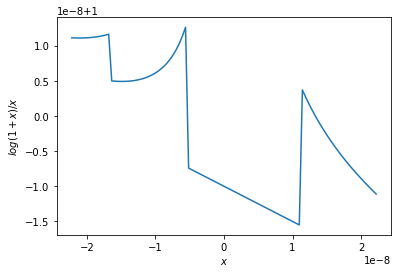

In [19]:
ends = 2.220446049250313e-8

x = np.linspace(-ends, ends, 100)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

Text(0,0.5,'$log(1+x)/x$')

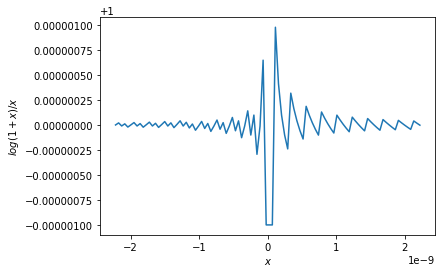

In [20]:
ends = 2.220446049250313e-9

x = np.linspace(-ends, ends, 100)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

Text(0,0.5,'$log(1+x)/x$')

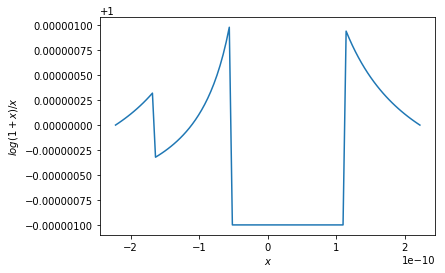

In [21]:
ends = 2.220446049250313e-10

x = np.linspace(-ends, ends, 100)
y = np.log(1+x)/x

plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')

As we can see, when we decrease x to magnitudes comparable to machine epsilon, the figure changed from a smooth curve to a irregular figure.  

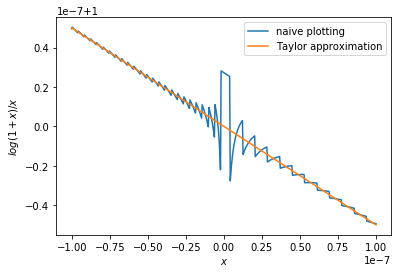

In [22]:
# the Taylor expansion

end = 1e-7

x = np.linspace(-end, end, 500)
y = np.log(1+x)/x

yApprox = 1 - x/2 + x*x/3 - x*x*x/4

plt.xlabel('$x$')
plt.ylabel('$log(1+x)/x$')
plt.plot(x, y, label = 'naive plotting')
plt.plot(x, yApprox, label = 'Taylor approximation')
plt.legend()

### Conclusion
By study the machine error, I learned how computers store numbers and how it works. Also how to transform between decimal and binary. The machine error is not an error due to the calculation. It is because of the limit of the way the computer store numbers. There are 32 bits, 64 bits, and 80 bits total three ways to store numbers, and it is true that the higher the bits the higher the precision. It is enough for most of the use, for example, the game design. However, if we go up to the limit, it will become an error, one example is the plot I did in this project. When we decrease the value of x very close to the machine epsilon, the figure became inaccurate. The more close to the machine epsilon the more inaccuracy.  


### Citation Page

Machine error, Computer Hope

https://www.computerhope.com/jargon/m/macherro.htm

Machine epsilon, Wikipedia

https://en.wikipedia.org/wiki/Machine_epsilon

Computer number format, Wikipedia

https://en.wikipedia.org/wiki/Computer_number_format

Floating Point Numbers, Computerphile

https://www.youtube.com/watch?v=PZRI1IfStY0

IEEE 754, Wikipedia

https://en.wikipedia.org/wiki/IEEE_754

What is the maximum float in Python? Martin Thoma

https://stackoverflow.com/questions/3477283/what-is-the-maximum-float-in-python

What is the maximum value of float in Python? Pythonic

https://www.tutorialspoint.com/What-is-the-maximum-value-of-float-in-Python

